Importamos todas las librerias necesarias y despues todos los datasets que vamos a usar. 

In [2]:
pip install contextily



[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: C:\Users\Usuario\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [3]:
pip install geopandas

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: C:\Users\Usuario\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [4]:
pip install plotly


[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: C:\Users\Usuario\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [5]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from bokeh.models import GeoJSONDataSource
from bokeh.plotting import figure, show
from bokeh.io import output_notebook
import plotly.express as px

In [6]:
df_resultados = pd.read_csv('2023_Generales\ResultadosElectorales_2023.csv')

C:\Users\Usuario\AppData\Local\Temp\ipykernel_14696\2489760224.py:1: DtypeWarning: Columns (7,10,11,20) have mixed types. Specify dtype option on import or set low_memory=False.
  df_resultados = pd.read_csv('2023_Generales\ResultadosElectorales_2023.csv')


In [7]:
df_caba = pd.read_csv('2023_Generales\CABA-circuitos-electorales.csv')
df_ambitos = pd.read_csv('2023_Generales/Ambitos_Generales_2023.csv')
df_colores = pd.read_csv('2023_Generales/Colores_2023.csv')

In [8]:
df_resultados.head().T

,0,1,2,3,4
año,2023,2023,2023,2023,2023
eleccion_tipo,GENERAL,GENERAL,GENERAL,GENERAL,GENERAL
recuento_tipo,PROVISORIO,PROVISORIO,PROVISORIO,PROVISORIO,PROVISORIO
padron_tipo,NORMAL,NORMAL,NORMAL,NORMAL,NORMAL
distrito_id,1,1,1,1,1
distrito_nombre,Ciudad Autónoma de Buenos Aires,Ciudad Autónoma de Buenos Aires,Ciudad Autónoma de Buenos Aires,Ciudad Autónoma de Buenos Aires,Ciudad Autónoma de Buenos Aires
seccionprovincial_id,0,0,0,0,0
seccionprovincial_nombre,NaN,NaN,NaN,NaN,NaN
seccion_id,1,1,1,1,1
seccion_nombre,Comuna 01,Comuna 01,Comuna 01,Comuna 01,Comuna 01


In [9]:
df_caba.head()

,WKT,ID,CIRCUITO_N,COMUNA,BARRIO,TOTAL,MASCULINO,FEMENINO,PERIMETRO,AREA
0,MULTIPOLYGON (((-58.3661871461469 -34.62043128...,1,1,1,SAN TELMO,11377.0,5695.0,5682.0,4157.175563,7.097216e+05
1,MULTIPOLYGON (((-58.3773566900831 -34.61744732...,2,2,1,SAN TELMO,11365.0,5870.0,5495.0,3045.858735,5.234309e+05
2,MULTIPOLYGON (((-58.3572938809189 -34.59510562...,3,3,1,PUERTO MADERO,702.0,416.0,286.0,14439.585623,4.248033e+06
3,MULTIPOLYGON (((-58.3671229141027 -34.61213671...,4,4,1,PUERTO MADERO,489.0,307.0,182.0,8028.115470,7.773725e+05
4,MULTIPOLYGON (((-58.3835637305124 -34.57823507...,5,5,1,RETIRO,5275.0,3131.0,2144.0,16401.981477,3.262096e+06


In [10]:
df_ambitos.head()

,año,distrito_id,distrito_nombre,seccionprovincial_id,seccionprovincial_nombre,seccion_id,seccion_nombre
0,2023,1,Ciudad Autónoma de Buenos Aires,0,NaN,1,Comuna 01
1,2023,1,Ciudad Autónoma de Buenos Aires,0,NaN,2,Comuna 02
2,2023,1,Ciudad Autónoma de Buenos Aires,0,NaN,3,Comuna 03
3,2023,1,Ciudad Autónoma de Buenos Aires,0,NaN,4,Comuna 04
4,2023,1,Ciudad Autónoma de Buenos Aires,0,NaN,5,Comuna 05


In [11]:
df_colores.head()

,año,distrito_id,agrupacion_nombre,agrupacion_id,agrupacion_color
0,2023,1,Ciudad Autónoma de Buenos Aires,13,#E7635F
1,2023,2,Buenos Aires,13,#E7635F
2,2023,3,Catamarca,13,#E7635F
3,2023,4,Córdoba,13,#E7635F
4,2023,5,Corrientes,13,#E7635F


In [12]:
df_resultados_caba = df_resultados[df_resultados['distrito_id'] == 1]
df_resultados_caba.head()

,año,eleccion_tipo,recuento_tipo,padron_tipo,distrito_id,distrito_nombre,seccionprovincial_id,seccionprovincial_nombre,seccion_id,seccion_nombre,...,mesa_tipo,mesa_electores,cargo_id,cargo_nombre,agrupacion_id,agrupacion_nombre,lista_numero,lista_nombre,votos_tipo,votos_cantidad
0,2023,GENERAL,PROVISORIO,NORMAL,1,Ciudad Autónoma de Buenos Aires,0,NaN,1,Comuna 01,...,NATIVOS,343,1,PRESIDENTE Y VICE,0,NaN,0.0,NaN,NULO,0
1,2023,GENERAL,PROVISORIO,NORMAL,1,Ciudad Autónoma de Buenos Aires,0,NaN,1,Comuna 01,...,NATIVOS,343,1,PRESIDENTE Y VICE,0,NaN,0.0,NaN,IMPUGNADO,0
2,2023,GENERAL,PROVISORIO,NORMAL,1,Ciudad Autónoma de Buenos Aires,0,NaN,1,Comuna 01,...,NATIVOS,343,1,PRESIDENTE Y VICE,0,NaN,0.0,NaN,RECURRIDO,0
3,2023,GENERAL,PROVISORIO,NORMAL,1,Ciudad Autónoma de Buenos Aires,0,NaN,1,Comuna 01,...,NATIVOS,343,1,PRESIDENTE Y VICE,0,NaN,0.0,NaN,COMANDO,0
4,2023,GENERAL,PROVISORIO,NORMAL,1,Ciudad Autónoma de Buenos Aires,0,NaN,1,Comuna 01,...,NATIVOS,349,1,PRESIDENTE Y VICE,134,UNION POR LA PATRIA,NaN,NaN,POSITIVO,95


In [13]:
df_resultados_caba.shape    

(515822, 23)

In [14]:
df_resultados_caba['votos_cantidad'].sum()

13646850

In [15]:
df_caba['TOTAL'].sum()

2497035.0

In [16]:
for columna in df_resultados_caba.columns:
    print(f"Opciones únicas en la columna {columna}:")
    print(df_resultados_caba[columna].unique())
    print("\n")  

Opciones únicas en la columna año:
[2023]


Opciones únicas en la columna eleccion_tipo:
['GENERAL']


Opciones únicas en la columna recuento_tipo:
['PROVISORIO']


Opciones únicas en la columna padron_tipo:
['NORMAL']


Opciones únicas en la columna distrito_id:
[1]


Opciones únicas en la columna distrito_nombre:
['Ciudad Autónoma de Buenos Aires']


Opciones únicas en la columna seccionprovincial_id:
[0]


Opciones únicas en la columna seccionprovincial_nombre:
[nan]


Opciones únicas en la columna seccion_id:
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]


Opciones únicas en la columna seccion_nombre:
['Comuna 01' 'Comuna 02' 'Comuna 03' 'Comuna 04' 'Comuna 05' 'Comuna 06'
 'Comuna 07' 'Comuna 08' 'Comuna 09' 'Comuna 10' 'Comuna 11' 'Comuna 12'
 'Comuna 13' 'Comuna 14' 'Comuna 15']


Opciones únicas en la columna circuito_id:
['00018' '00019' '00001' '00002' '00003' '00004' '00005' '00006' '00007'
 '00008' '00009' '00010' '00020' '00021' '00022' '00023' '00024' '00011'
 '00012' '0

In [17]:
for columna in df_caba.columns:
    print(f"Opciones únicas en la columna {columna}:")
    print(df_caba[columna].unique())
    print("\n") 

Opciones únicas en la columna WKT:
['MULTIPOLYGON (((-58.3661871461469 -34.6204312876783,-58.3660639106602 -34.621515418103,-58.3658425950003 -34.6237048832166,-58.3658342563784 -34.623835253489,-58.3657919798787 -34.6239884106249,-58.3654779550486 -34.6239704890445,-58.3640983812104 -34.6247099910476,-58.3635108880291 -34.6249876716871,-58.3634535130463 -34.6251237728734,-58.3664821002131 -34.6251912978642,-58.3679784789629 -34.62519842047,-58.3679550369998 -34.6271427044301,-58.3680980198034 -34.6271931268357,-58.368251981578 -34.6273183042386,-58.3686156102674 -34.6276353327267,-58.3694356610091 -34.6283186865831,-58.3706574008251 -34.6294995959563,-58.3709626379646 -34.6266508132812,-58.3713063658055 -34.6266628839813,-58.3725521459197 -34.6267466708693,-58.3745640705045 -34.6268014291647,-58.3755730893349 -34.6273052700513,-58.3762237604151 -34.6262869670616,-58.3767496130235 -34.6251220540446,-58.3770806317425 -34.6234886898763,-58.3772237938455 -34.6220465198698,-58.377231539720

In [18]:
for columna in df_colores.columns:
    print(f"Opciones únicas en la columna {columna}:")
    print(df_colores[columna].unique())
    print("\n")  

Opciones únicas en la columna año:
[2023]


Opciones únicas en la columna distrito_id:
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
  0]


Opciones únicas en la columna agrupacion_nombre:
['Ciudad Autónoma de Buenos Aires' 'Buenos Aires' 'Catamarca' 'Córdoba'
 'Corrientes' 'Chaco' 'Chubut' 'Entre Ríos' 'Formosa' 'Jujuy' 'La Pampa'
 'La Rioja' 'Mendoza' 'Misiones' 'Neuquén' 'Río Negro' 'Salta' 'San Juan'
 'San Luis' 'Santa Cruz' 'Santa Fe' 'Santiago del Estero' 'Tucumán'
 'Tierra del Fuego, Antártida e Islas del Atlántico Sur' 'ARGENTINA']


Opciones únicas en la columna agrupacion_id:
[  13  131  132  133  134  135  136  137  151  153  167  177  180  181
  184  186  188  191  193  194  198   20  201  208  210 2103  211  212
  215  216  218  220  221  223  229   23  231  238  239  258  262  268
  276  297  298  304  309  311  317  318  319  321  323  324  328  329
  333  343  345  347  350  351   36   40    5  501  502  503  504  505
  506  554   57  642   65

In [19]:
for columna in df_ambitos.columns:
    print(f"Opciones únicas en la columna {columna}:")
    print(df_ambitos[columna].unique())
    print("\n") 

Opciones únicas en la columna año:
[2023]


Opciones únicas en la columna distrito_id:
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24]


Opciones únicas en la columna distrito_nombre:
['Ciudad Autónoma de Buenos Aires' 'Buenos Aires' 'Catamarca' 'Córdoba'
 'Corrientes' 'Chaco' 'Chubut' 'Entre Ríos' 'Formosa' 'Jujuy' 'La Pampa'
 'La Rioja' 'Mendoza' 'Misiones' 'Neuquén' 'Río Negro' 'Salta' 'San Juan'
 'San Luis' 'Santa Cruz' 'Santa Fe' 'Santiago del Estero' 'Tucumán'
 'Tierra del Fuego, Antártida e Islas del Atlántico Sur']


Opciones únicas en la columna seccionprovincial_id:
[0 1 2 3 4 5 6 7 8]


Opciones únicas en la columna seccionprovincial_nombre:
[nan 'Sección Primera' 'Sección Segunda' 'Sección Tercera'
 'Sección Cuarta' 'Sección Quinta' 'Sección Sexta' 'Sección Séptima'
 'Sección Capital' 'Capital' 'Este' 'Oeste']


Opciones únicas en la columna seccion_id:
[  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  35  45
  51  52  53  71  75  7

In [30]:
df_resultados_caba['seccion_id'] = df_resultados_caba['seccion_id'].astype(int)

df_caba['COMUNA'] = df_caba['COMUNA'].astype(int)

df_combinado = pd.merge(df_resultados_caba, df_caba, left_on='seccion_id', right_on='COMUNA', how='left')

df_combinado.head(-100).T

C:\Users\Usuario\AppData\Local\Temp\ipykernel_14696\1847314845.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,0,1,2,3,4,5,6,7,8,9,...,5850294,5850295,5850296,5850297,5850298,5850299,5850300,5850301,5850302,5850303
año,2023,2023,2023,2023,2023,2023,2023,2023,2023,2023,...,2023,2023,2023,2023,2023,2023,2023,2023,2023,2023
eleccion_tipo,GENERAL,GENERAL,GENERAL,GENERAL,GENERAL,GENERAL,GENERAL,GENERAL,GENERAL,GENERAL,...,GENERAL,GENERAL,GENERAL,GENERAL,GENERAL,GENERAL,GENERAL,GENERAL,GENERAL,GENERAL
recuento_tipo,PROVISORIO,PROVISORIO,PROVISORIO,PROVISORIO,PROVISORIO,PROVISORIO,PROVISORIO,PROVISORIO,PROVISORIO,PROVISORIO,...,PROVISORIO,PROVISORIO,PROVISORIO,PROVISORIO,PROVISORIO,PROVISORIO,PROVISORIO,PROVISORIO,PROVISORIO,PROVISORIO
padron_tipo,NORMAL,NORMAL,NORMAL,NORMAL,NORMAL,NORMAL,NORMAL,NORMAL,NORMAL,NORMAL,...,NORMAL,NORMAL,NORMAL,NORMAL,NORMAL,NORMAL,NORMAL,NORMAL,NORMAL,NORMAL
distrito_id,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
distrito_nombre,Ciudad Autónoma de Buenos Aires,Ciudad Autónoma de Buenos Aires,Ciudad Autónoma de Buenos Aires,Ciudad Autónoma de Buenos Aires,Ciudad Autónoma de Buenos Aires,Ciudad Autónoma de Buenos Aires,Ciudad Autónoma de Buenos Aires,Ciudad Autónoma de Buenos Aires,Ciudad Autónoma de Buenos Aires,Ciudad Autónoma de Buenos Aires,...,Ciudad Autónoma de Buenos Aires,Ciudad Autónoma de Buenos Aires,Ciudad Autónoma de Buenos Aires,Ciudad Autónoma de Buenos Aires,Ciudad Autónoma de Buenos Aires,Ciudad Autónoma de Buenos Aires,Ciudad Autónoma de Buenos Aires,Ciudad Autónoma de Buenos Aires,Ciudad Autónoma de Buenos Aires,Ciudad Autónoma de Buenos Aires
seccionprovincial_id,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
seccionprovincial_nombre,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
seccion_id,1,1,1,1,1,1,1,1,1,1,...,5,5,5,5,5,5,5,5,5,5
seccion_nombre,Comuna 01,Comuna 01,Comuna 01,Comuna 01,Comuna 01,Comuna 01,Comuna 01,Comuna 01,Comuna 01,Comuna 01,...,Comuna 05,Comuna 05,Comuna 05,Comuna 05,Comuna 05,Comuna 05,Comuna 05,Comuna 05,Comuna 05,Comuna 05


In [21]:
df_combinado.shape

(5850404, 33)

In [22]:
for columna in df_combinado.columns:
    print(f"Opciones únicas en la columna {columna}:")
    print(df_combinado[columna].unique())
    print("\n") 

Opciones únicas en la columna año:
[2023]


Opciones únicas en la columna eleccion_tipo:
['GENERAL']


Opciones únicas en la columna recuento_tipo:
['PROVISORIO']


Opciones únicas en la columna padron_tipo:
['NORMAL']


Opciones únicas en la columna distrito_id:
[1]


Opciones únicas en la columna distrito_nombre:
['Ciudad Autónoma de Buenos Aires']


Opciones únicas en la columna seccionprovincial_id:
[0]


Opciones únicas en la columna seccionprovincial_nombre:
[nan]


Opciones únicas en la columna seccion_id:
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]


Opciones únicas en la columna seccion_nombre:
['Comuna 01' 'Comuna 02' 'Comuna 03' 'Comuna 04' 'Comuna 05' 'Comuna 06'
 'Comuna 07' 'Comuna 08' 'Comuna 09' 'Comuna 10' 'Comuna 11' 'Comuna 12'
 'Comuna 13' 'Comuna 14' 'Comuna 15']


Opciones únicas en la columna circuito_id:
['00018' '00019' '00001' '00002' '00003' '00004' '00005' '00006' '00007'
 '00008' '00009' '00010' '00020' '00021' '00022' '00023' '00024' '00011'
 '00012' '0

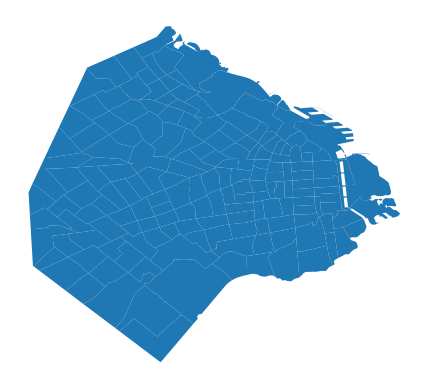

In [23]:
gdf = gpd.GeoDataFrame(df_caba, geometry=gpd.GeoSeries.from_wkt(df_caba['WKT']))
ax = gdf.plot()
ax.set_xlabel(None)
ax.set_ylabel(None)
ax.set_xticks([])
ax.set_yticks([])
ax.set_frame_on(False)

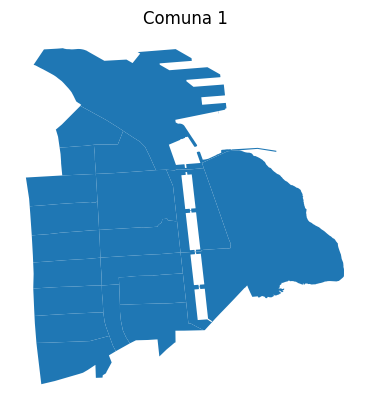

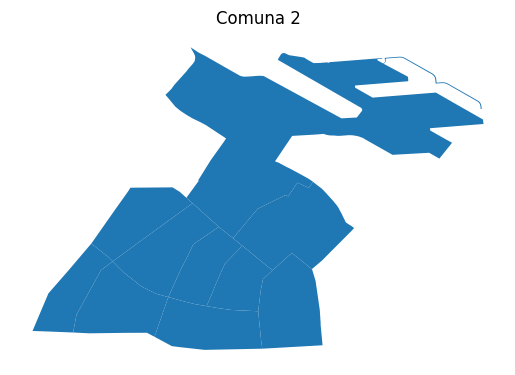

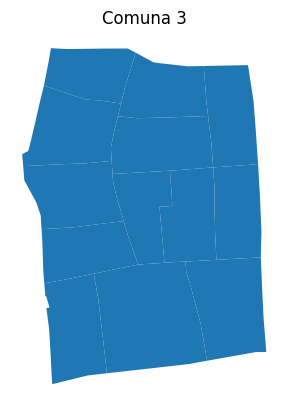

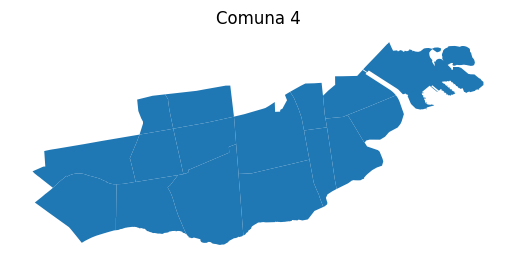

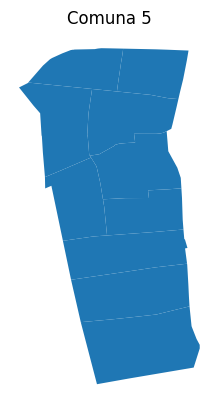

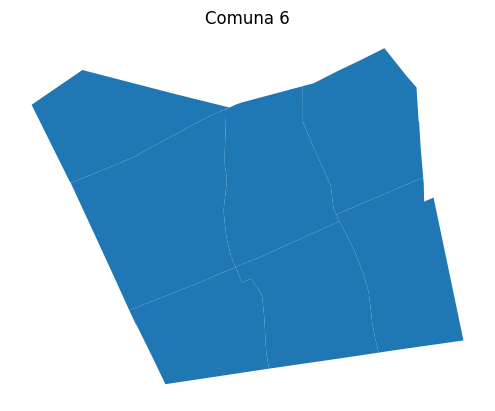

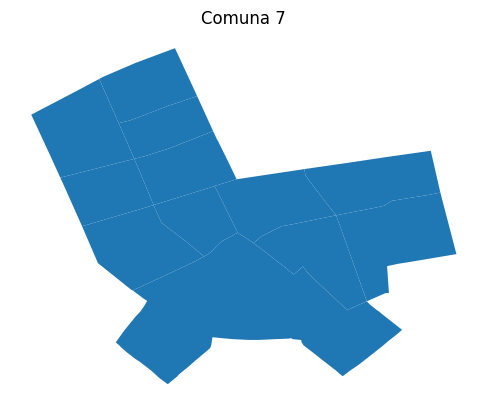

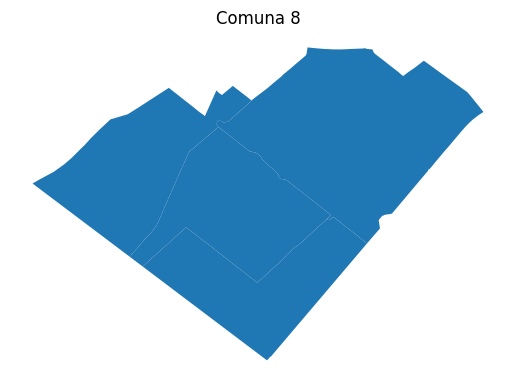

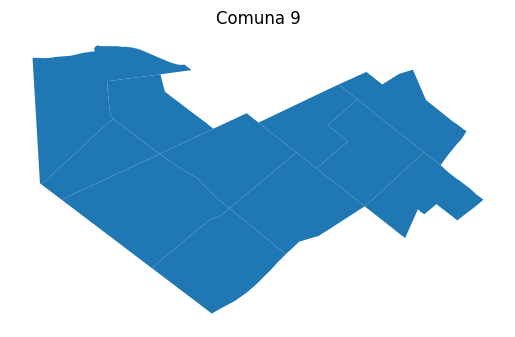

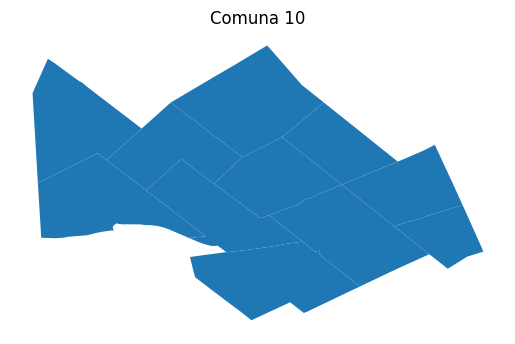

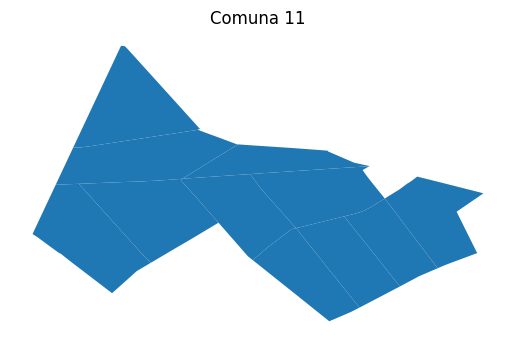

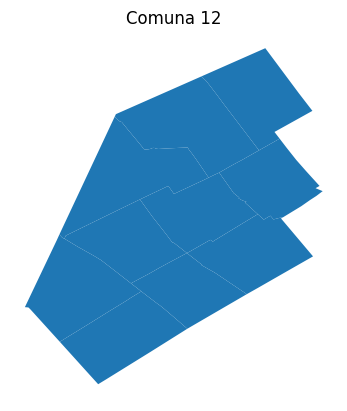

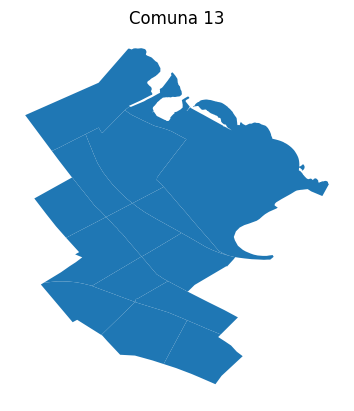

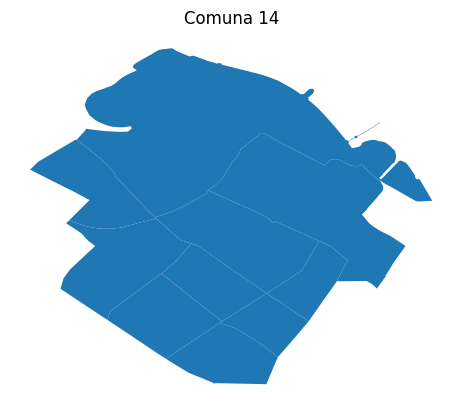

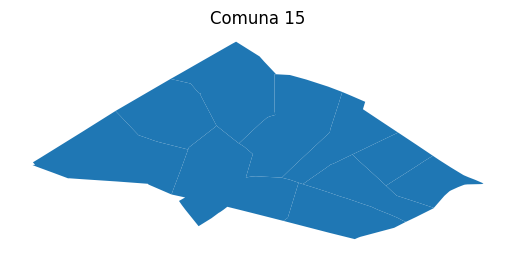

In [24]:
for comuna in gdf['COMUNA'].unique():
    ax = gdf[gdf['COMUNA'] == comuna].plot()
    ax.set_title(f"Comuna {comuna}")
    ax.set_xlabel(None)
    ax.set_ylabel(None)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_frame_on(False)

In [25]:
print(df_combinado.columns)

Index(['año', 'eleccion_tipo', 'recuento_tipo', 'padron_tipo', 'distrito_id',
       'distrito_nombre', 'seccionprovincial_id', 'seccionprovincial_nombre',
       'seccion_id', 'seccion_nombre', 'circuito_id', 'circuito_nombre',
       'mesa_id', 'mesa_tipo', 'mesa_electores', 'cargo_id', 'cargo_nombre',
       'agrupacion_id', 'agrupacion_nombre', 'lista_numero', 'lista_nombre',
       'votos_tipo', 'votos_cantidad', 'WKT', 'ID', 'CIRCUITO_N', 'COMUNA',
       'BARRIO', 'TOTAL', 'MASCULINO', 'FEMENINO', 'PERIMETRO', 'AREA'],
      dtype='object')


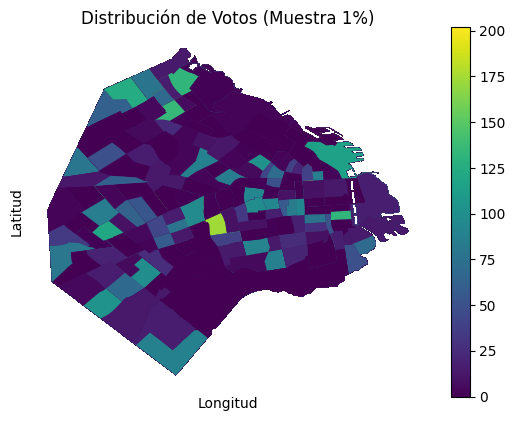

In [31]:
df_muestra = df_combinado.sample(frac=0.01, random_state=1)
gdf_muestra = gpd.GeoDataFrame(df_muestra, geometry=gpd.GeoSeries.from_wkt(df_muestra['WKT']))

ax = gdf_muestra.plot(column='votos_cantidad', cmap='viridis', legend=True)
ax.set_title('Distribución de Votos (Muestra 1%)')
ax.set_xlabel('Longitud')
ax.set_ylabel('Latitud')
ax.set_xticks([])
ax.set_yticks([])
ax.set_frame_on(False)


plt.show()

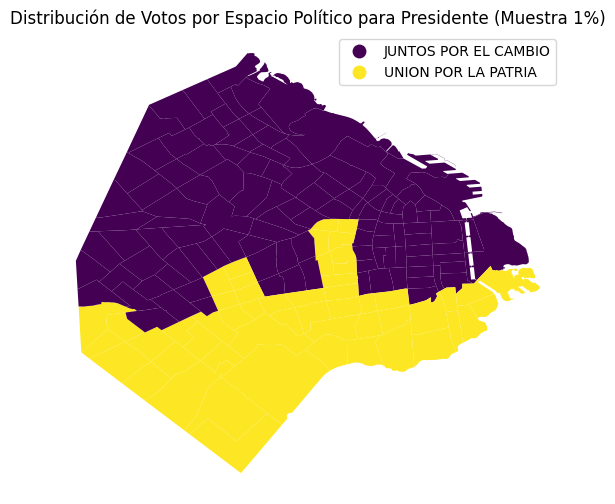

In [35]:
df_presidente_muestra = df_muestra[df_muestra['cargo_nombre'] == 'PRESIDENTE Y VICE']

df_votos_por_comuna_muestra = df_presidente_muestra.groupby(['COMUNA', 'agrupacion_nombre'])['votos_cantidad'].sum().reset_index()

df_max_votos_muestra = df_votos_por_comuna_muestra.loc[df_votos_por_comuna_muestra.groupby('COMUNA')['votos_cantidad'].idxmax()]

gdf_votos_comuna_muestra = gdf.merge(df_max_votos_muestra, on='COMUNA')

fig, ax = plt.subplots(1, 1, figsize=(10, 6))
gdf_votos_comuna_muestra.plot(column='agrupacion_nombre', cmap='viridis', legend=True, ax=ax)
ax.set_title('Distribución de Votos por Espacio Político para Presidente (Muestra 1%)')
ax.set_axis_off()
plt.show()


In [36]:
print(df_muestra['COMUNA'].value_counts())
print(df_muestra['agrupacion_nombre'].value_counts())


df_votos_por_comuna_muestra = df_muestra.groupby(['COMUNA', 'agrupacion_nombre'])['votos_cantidad'].sum().reset_index()
print(df_votos_por_comuna_muestra.sort_values(by='votos_cantidad', ascending=False))

df_max_votos_muestra = df_votos_por_comuna_muestra.loc[df_votos_por_comuna_muestra.groupby('COMUNA')['votos_cantidad'].idxmax()]
print(df_max_votos_muestra)


COMUNA
1     7300
13    6005
4     5572
7     4509
3     4305
14    4193
11    3796
12    3747
10    3278
9     3272
15    3246
5     3128
2     2763
6     2144
8     1246
Name: count, dtype: int64
agrupacion_nombre
JUNTOS POR EL CAMBIO                              6457
UNION POR LA PATRIA                               6358
LA LIBERTAD AVANZA                                6321
FRENTE DE IZQUIERDA Y DE TRABAJADORES - UNIDAD    6234
HACEMOS POR NUESTRO PAIS                          1627
PRINCIPIOS Y VALORES                                73
Name: count, dtype: int64
    COMUNA         agrupacion_nombre  votos_cantidad
63      13      JUNTOS POR EL CAMBIO           94936
2        1      JUNTOS POR EL CAMBIO           70727
68      14      JUNTOS POR EL CAMBIO           58787
58      12      JUNTOS POR EL CAMBIO           50907
19       4       UNION POR LA PATRIA           49429
..     ...                       ...             ...
67      14  HACEMOS POR NUESTRO PAIS             671
26  